In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  


In [2]:
demo_df = pd.read_csv('output.csv') 

In [3]:
demo_df.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic,year_x,state,state_fips,...,lang_2_freq,educ_attain_2.0_freq,educ_attain_1.0_freq,educ_attain_3.0_freq,educ_attain_4.0_freq,empstat_1.0_freq,empstat_3.0_freq,empstat_2.0_freq,state_po_y,winner
0,AL,Abanda CDP,67.2,30.2,0.0,0.0,1.6,2008,ALABAMA,1,...,5.0,50.8,42.1,6.4,0.7,66.0,30.9,3.1,AL,1.0
1,AL,Abanda CDP,67.2,30.2,0.0,0.0,1.6,2008,ALABAMA,1,...,3.1,40.2,52.9,6.2,0.7,56.4,39.8,3.8,AL,1.0
2,AL,Abanda CDP,67.2,30.2,0.0,0.0,1.6,2008,ALABAMA,1,...,11.9,54.1,36.4,8.7,0.8,69.5,26.6,3.9,AL,1.0
3,AL,Abanda CDP,67.2,30.2,0.0,0.0,1.6,2008,ALABAMA,1,...,21.0,48.5,43.5,7.2,0.8,57.5,39.0,3.5,AL,1.0
4,AL,Abanda CDP,67.2,30.2,0.0,0.0,1.6,2012,ALABAMA,1,...,4.2,38.6,55.8,4.9,0.7,58.7,38.1,3.3,AL,1.0


In [4]:
demo_df.columns

Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic', 'year_x',
       'state', 'state_fips', 'state_cen', 'state_ic', 'office', 'candidate',
       'party_detailed', 'writein', 'candidatevotes', 'totalvotes', 'version',
       'party_simplified', 'year_y', 'inctot', 'mortamt1', 'avrg_age',
       'ftotinc', 'foodstmp_1_freq', 'foodstmp_2_freq', 'sex_2_freq',
       'sex_1_freq', 'marst_5_freq', 'marst_6_freq', 'marst_1_freq',
       'marst_4_freq', 'marst_3_freq', 'marst_2_freq', 'race_1_freq',
       'race_2_freq', 'race_7_freq', 'race_8_freq', 'race_5_freq',
       'race_6_freq', 'race_3_freq', 'race_4_freq', 'race_9_freq',
       'ctz_stat_1_freq', 'ctz_stat_3_freq', 'ctz_stat_2_freq', 'lang_1_freq',
       'lang_2_freq', 'educ_attain_2.0_freq', 'educ_attain_1.0_freq',
       'educ_attain_3.0_freq', 'educ_attain_4.0_freq', 'empstat_1.0_freq',
       'empstat_3.0_freq', 'empstat_2.0_freq', 'state_po_y', 'winn

In [5]:
unique_states = demo_df['state'].unique()
unique_states

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE',
       'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA',
       'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA',
       'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE',
       'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST VIRGINIA', 'WISCONSIN', 'WYOMING'], dtype=object)

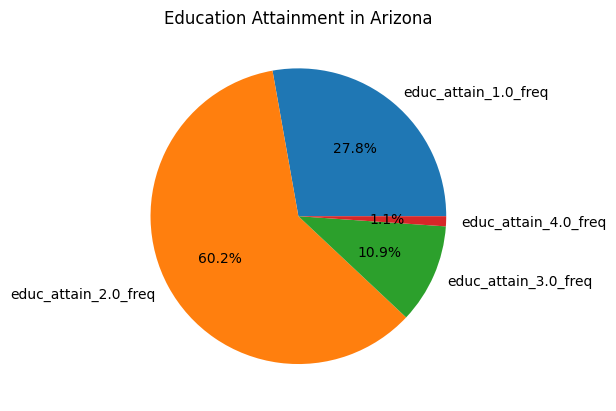

In [7]:
df_state = demo_df[demo_df['state'] == 'ARIZONA']
df_state[['educ_attain_1.0_freq', 'educ_attain_2.0_freq', 'educ_attain_3.0_freq', 'educ_attain_4.0_freq']].mean().plot(kind='pie', autopct='%1.1f%%')
plt.title('Education Attainment in Arizona')
plt.ylabel('')
plt.show()


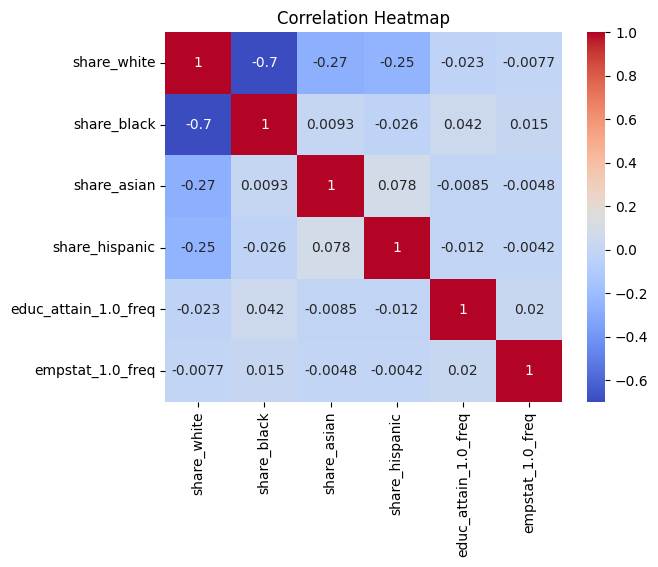

In [18]:
# Find correlations between racial demographics, education, and employment status.

import seaborn as sns

corr = demo_df[['share_white', 'share_black', 'share_asian', 'share_hispanic', 
           'educ_attain_1.0_freq', 'empstat_1.0_freq']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [9]:
unique_ages = demo_df['avrg_age'].nunique()
print(f"Number of unique ages: {unique_ages}")


Number of unique ages: 164


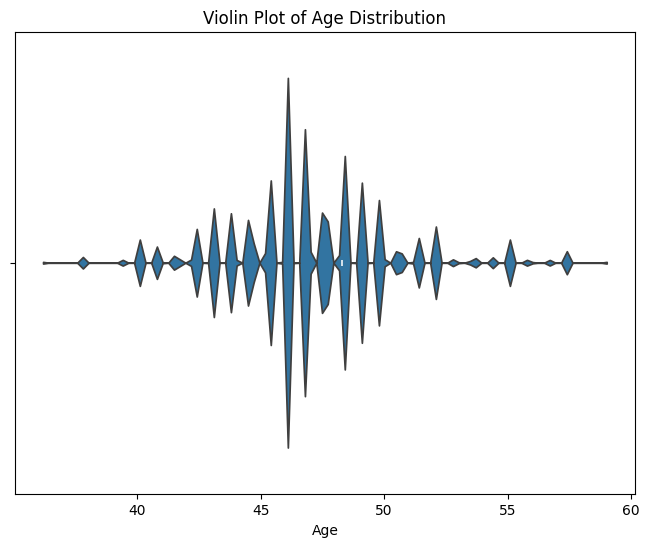

In [12]:
# Create a violin plot for the 'avrg_age' column
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.violinplot(x=demo_df['avrg_age'])
plt.title('Violin Plot of Age Distribution')
plt.xlabel('Age')
plt.show()

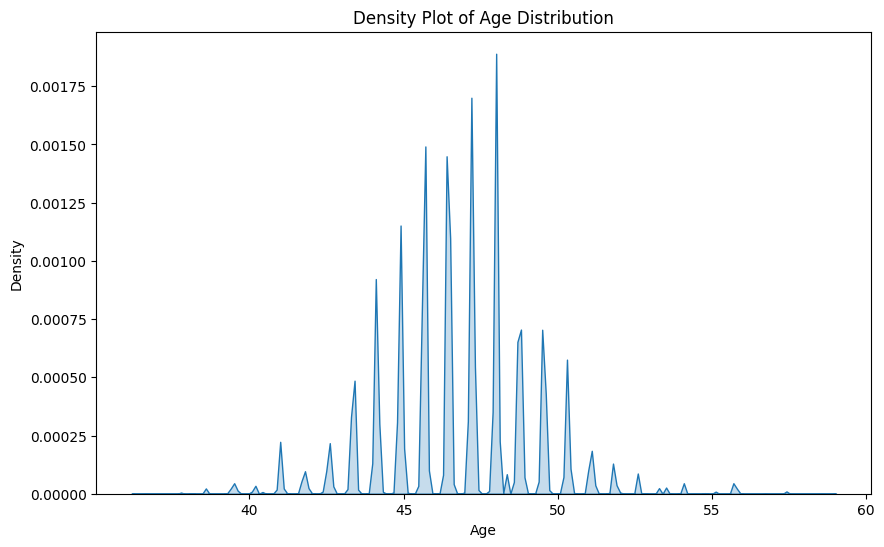

In [14]:


# Create a density plot for the 'avrg_age' column
plt.figure(figsize=(10, 6))
sns.kdeplot(demo_df['avrg_age'].dropna(), fill=True)
plt.title('Density Plot of Age Distribution')
plt.xlabel('Age')
plt.show()


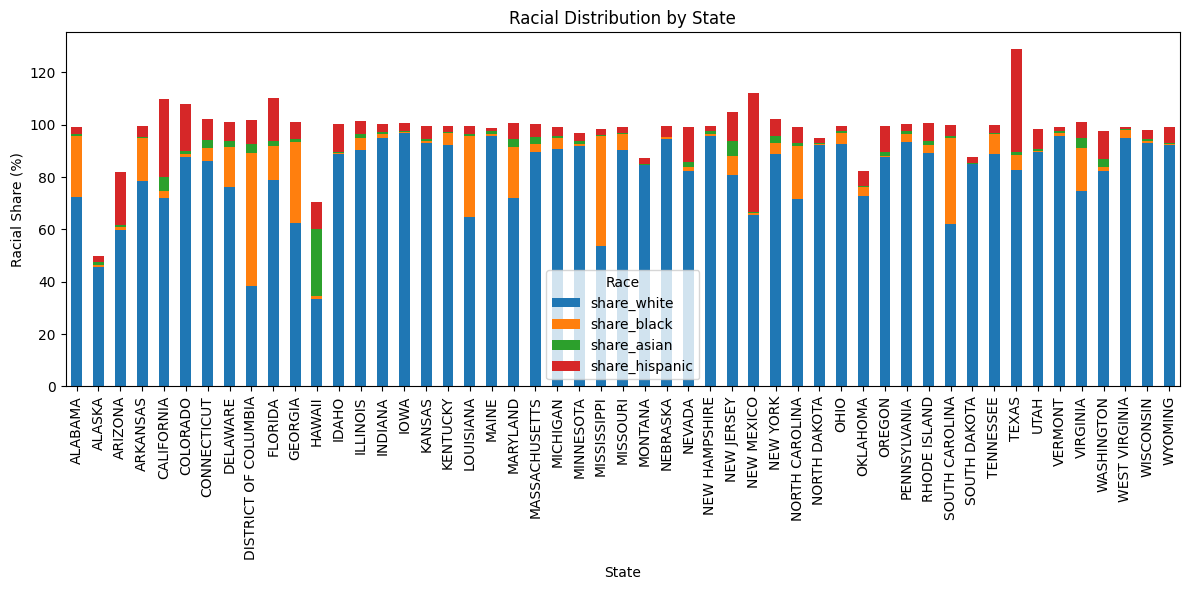

In [16]:
# Group by state and calculate the mean racial distribution for each state
df_state = demo_df.groupby('state')[['share_white', 'share_black', 'share_asian', 'share_hispanic']].mean()

# Plot the stacked bar chart
df_state.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

plt.title('Racial Distribution by State')
plt.xlabel('State')
plt.ylabel('Racial Share (%)')
plt.legend(loc='best', title='Race')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


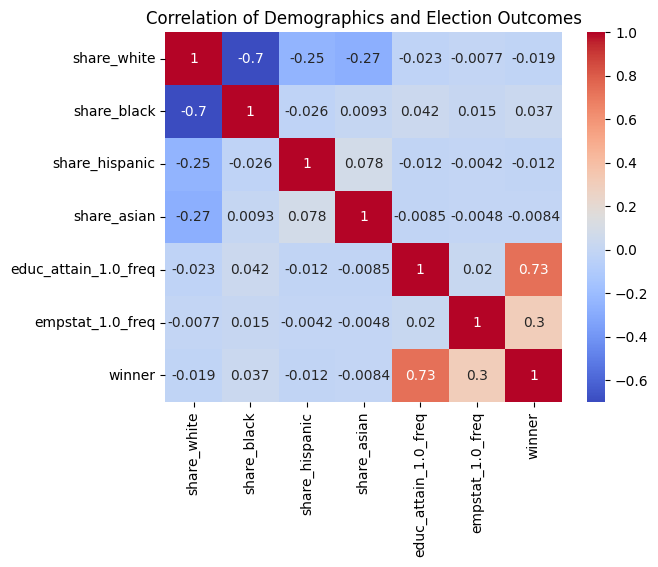

In [18]:

correlation_columns = ['share_white', 'share_black', 'share_hispanic', 'share_asian',
                       'educ_attain_1.0_freq', 'empstat_1.0_freq', 'winner']
corr = demo_df[correlation_columns].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation of Demographics and Election Outcomes')
plt.show()
